In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df=df.interpolate()

In [27]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [29]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape

(712, 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13588\2745916290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


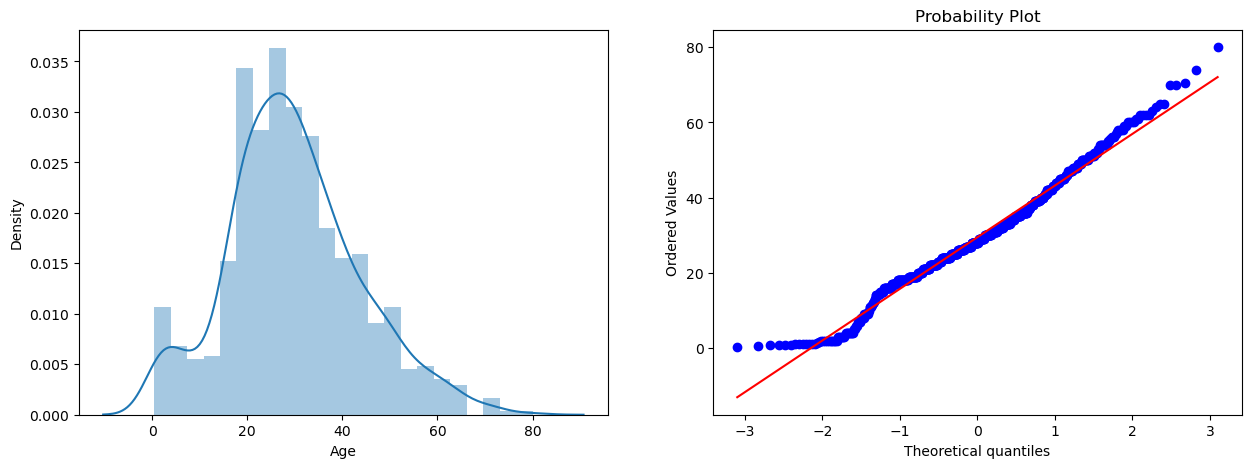

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13588\3752760398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


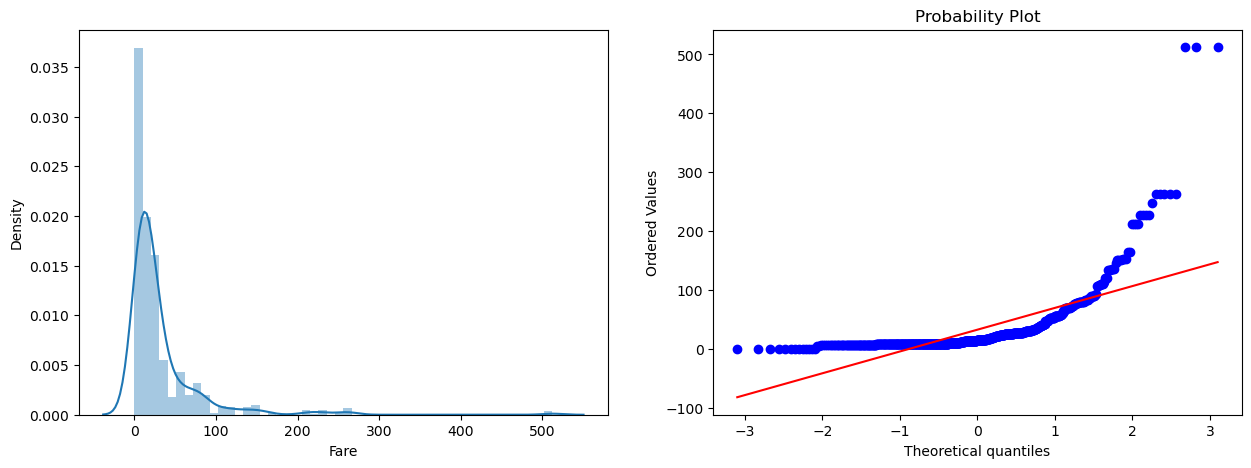

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)

plt.show()

In [39]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [47]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

a=accuracy_score(y_test,y_pred)
b=accuracy_score(y_test,y_pred1)

print('LogisticRegression=',a*100)
print('DecisionTreeClassifier=',b*100)

LogisticRegression= 65.36312849162012
DecisionTreeClassifier= 63.687150837988824


In [48]:
trf=FunctionTransformer(func=np.log1p)

In [49]:
trf1=trf.fit_transform(X_train)
trf2=trf.fit_transform(X_test)

In [50]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

a=accuracy_score(y_test,y_pred)
b=accuracy_score(y_test,y_pred1)

print('LogisticRegression=',a*100)
print('DecisionTreeClassifier=',b*100)

LogisticRegression= 65.36312849162012
DecisionTreeClassifier= 64.80446927374301


In [54]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

    

LR 0.6735580524344569
DT 0.6273657927590511


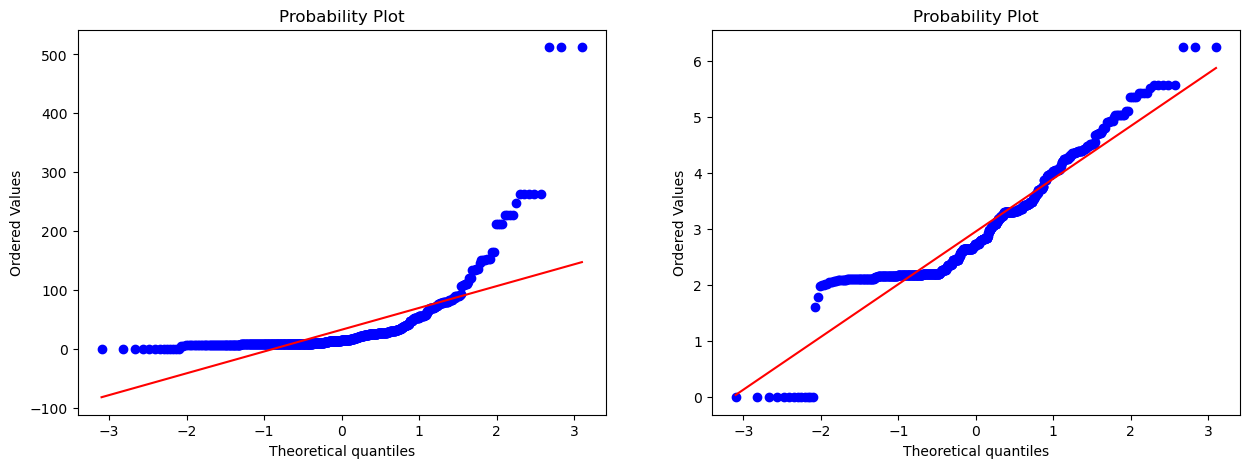

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.subplot(122)
stats.probplot(trf1['Fare'],dist="norm",plot=plt)

plt.show()

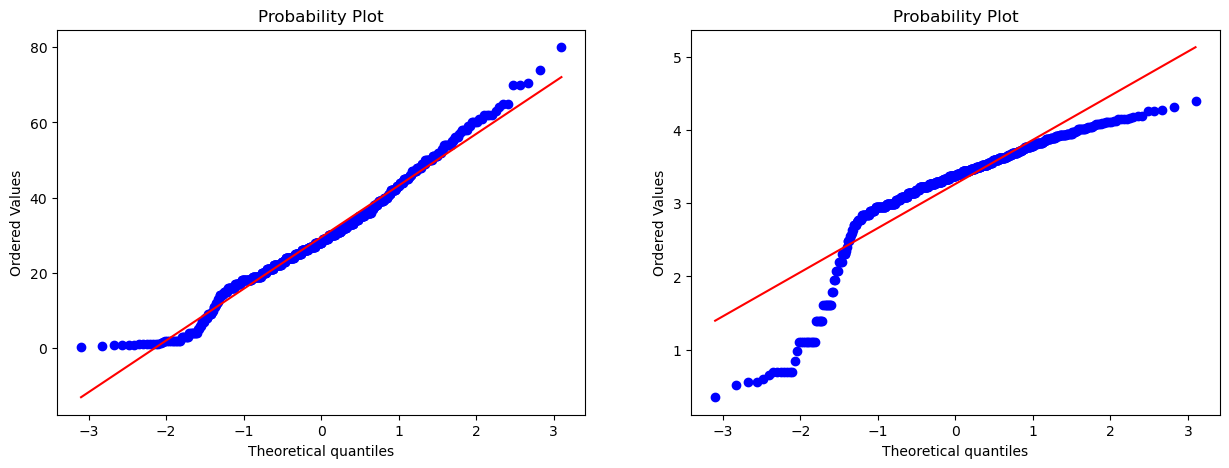

In [57]:
 plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.subplot(122)
stats.probplot(trf1['Age'],dist="norm",plot=plt)

plt.show()

In [59]:
trf3=ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

trf_x__train_transformed=trf3.fit_transform(X_train)
trf_x_test_transformed=trf3.fit_transform(X_test)

In [64]:
clf.fit(trf_x__train_transformed,y_train)
clf2.fit(trf_x__train_transformed,y_train)

y_pred=clf.predict(trf_x__train_transformed)
y_pred1=clf2.predict(trf_x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

ValueError: Found input variables with inconsistent numbers of samples: [179, 712]